In [21]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

# Notebook display options
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#sorted(plt.style.available)
plt.style.use('classic')

In [22]:

def GenFacCoeff(order):
    coeffs = np.zeros(int(order))
    for i in range(1, int(order)+1):
        coeffs[i-1] = 1.0 / factorial(i)

    return coeffs

In [23]:
import Polynomial_mine as Po

In [24]:
def High_Temp(N, T):
    return 0.5 + T - (N + 1.0)/4.0

def High_Temp_Poly(N, T, order, coeffs):
    #coeffs = GenFacCoeff(N)
    contributions = np.zeros(N)

    for i in range(1,N+1):
        contributions[i-1] = i/(i/T * Po.GenPolynomialValue_c(order, coeffs, i/T))
    
    return 0.5 + sum(contributions)/N

def Exact(N, T):
    _E = 0.5

    for k in range(1,N+1):
        _E += 1.0/N * (k/(np.exp(k/T)-1.0))

    return _E


0.5
0.51


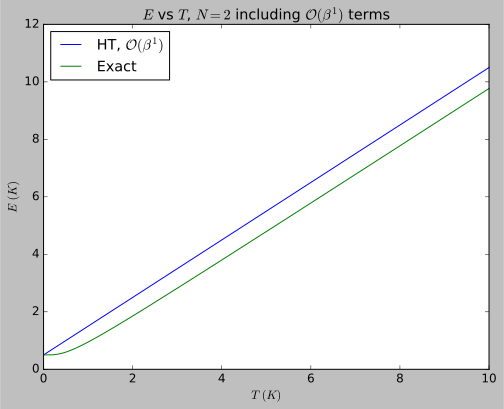

In [33]:
_T = np.linspace(0.01, 10, 1000)
N = 2
order = 1

coeffs = GenFacCoeff(order)
#print(coeffs)
HT_results = np.zeros(len(_T))

for i in range(len(_T)):
    HT_results[i] = High_Temp_Poly(N, _T[i], order, coeffs)

#plt.plot(_T, High_Temp(N, _T))
plt.plot(_T, HT_results, label=r"HT, $\mathcal{{O}}(\beta^{{{}}})$".format(order))
plt.plot(_T, Exact(N, _T), label="Exact")
plt.legend(loc="upper left")
plt.xlabel(r"$T\ (K)$")
plt.ylabel(r"$E\ (K)$")
plt.title(r"$E$ vs $T$, $N = {{{}}}$ including $\mathcal{{O}}(\beta^{{{}}})$ terms".format(N, order))
print(Exact(N, _T[0]))
print(HT_results[0])
plt.savefig('E_vs_T_SHO_N-' + str(N) + '_Order-' + str(order) + '.png', dpi=300)
